### Potential
##### The concept of potential is very useful in Physics. In context of a electric potential it is potential energy per unit charge that exists at a certain point in space. It is used when object experiences forces in a region without being in contact with other object e.g., force on charged objects and gravitational force. The following function depending on x and y coordinates, has been used as potential for visualization purpose. 
$$ f(x, y) = x \exp(x^2 + y^2)$$
#### Another useful vector quantity can be derived from potential known as gradient of potential and is given by;
$$ \nabla f = \vec{\textbf{V}}$$
#### Gradient is a vector quantitiy where the direction of arrow shows maximum change in potential in that direction. The more the potential change in a direction the arrow would have more magnitude. In electrostatics the region around a charge is the electric potential and the gradient is called electric field.  

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt 
#from matplotlib import pyplot as plt   # This is alternative way of calling the pyplot module of matplotlib library
from mpl_toolkits import mplot3d      # For 3D plots using matplotlib library

In [2]:
d = np.linspace(-2, 2, 20)
x, y = np.meshgrid(d, d)
phi_potential =  np.exp(-x**2 -y**2)
phi_potential2 =  y*np.exp(-x**2 -y**2)

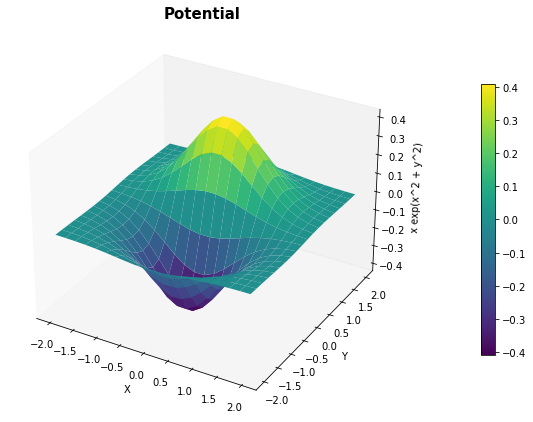

In [3]:
%matplotlib inline
fig = plt.figure(figsize = (10,10))
# ax = fig.add_subplot(1, 2, 1, projection = '3d')
# ax.plot_surface(x, y, phi_potential, cmap = 'viridis')
# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('exp(-x^2 + -y^2)')
# ax.set_title('Potential-1')

ax2 = fig.add_subplot(projection = '3d')
c2 = ax2.plot_surface(x, y, phi_potential2, cmap = 'viridis')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('x exp(x^2 + y^2)')
ax2.set_title('Potential', fontsize= 15, fontweight='bold')
ax2.grid(False)
plt.colorbar(c2, shrink=0.5, pad = 0.15)
plt.show()

In [4]:
dy, dx = np.gradient(phi_potential2)
potential_mag = np.sqrt(dx**2 + dy**2)

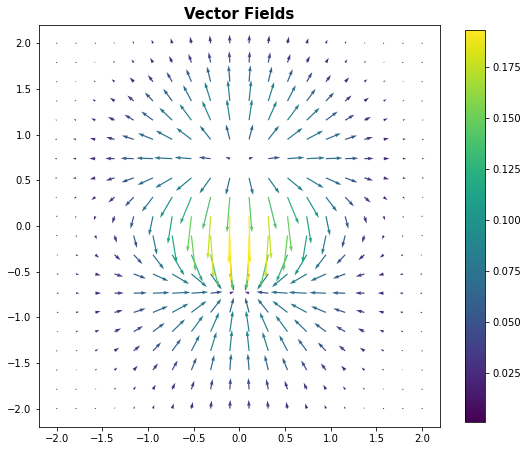

In [5]:
fig = plt.figure(figsize = (9,9))
ax2 = fig.add_subplot()
c2 = ax2.quiver(x, y, -dx, -dy, potential_mag, cmap = 'viridis')
ax2.set_aspect('equal')
ax2.set_title('Vector Fields', fontsize = 15, fontweight = 'bold')
plt.colorbar(c2, shrink=0.8)
plt.show()

### The above concept of potential has now benn applied to electric potential. The potential due to a charge is given by;
$$ V(r) = \frac{kq}{r}$$
where k is constant of propotionality (depends on medium or space), q is charge and r is the radial distance from the charge. For computation pupose a simple two dimension case has choosen. The potential would become;
$$ V(x, y) = \frac{kq}{\sqrt{x^2 + y^2}} $$

The electric field is gradient of electric potential, also described above, therefore;
$$ \vec{E}(r) = \frac{kq ~\vec{r}}{r^2} $$
The following form is useful for computation here;
$$ \vec{E}(x, y) = -\frac{kqx}{(x^2 + y^2)^{1.5}} \hat{i} - \frac{kqy}{(x^2 + y^2)^{1.5}} \hat{j} $$

In [6]:
N = 20   # number of rows
M = 20   # number of columns
x = np.linspace(-2, 2, N)
y = np.linspace(-2, 2, M)
x, y = np.meshgrid(x, y)

In [7]:
k = 9*10**9   # Nm^2/C^2
q1 = 10**-9   #  C
x1_pos = 0
y1_pos = 0

In [8]:
V_r = k*q1/np.sqrt(x**2 + y**2)
V_r_log10 = np.log10(V_r)

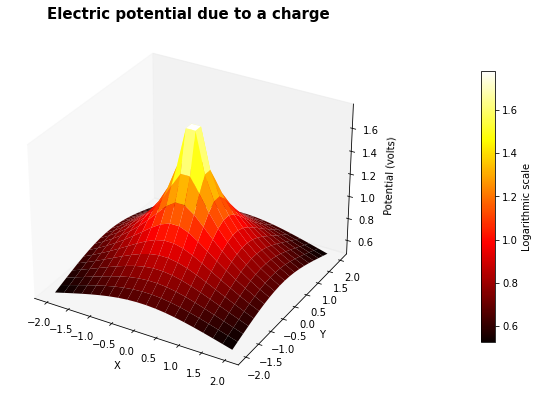

In [9]:
fig1 = plt.figure(figsize = (10, 10))
ax1 = fig1.add_subplot(projection = '3d')
c1 = ax1.plot_surface(x, y, V_r_log10, cmap = 'hot')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Potential (volts)')
ax1.set_title('Electric potential due to a charge', fontsize= 15, fontweight='bold')
ax1.grid(False)
cb = plt.colorbar(c1, shrink = 0.5, pad = 0.2)
cb.set_label('Logarithmic scale')   # logarithmic scale is chosen for consistent color distribution
plt.show()

In [10]:
ex = (k*q1*(x-x1_pos)) / ((x-x1_pos)**2 + (y-y1_pos)**2)**1.5
ey = (k*q1*(y-y1_pos)) / ((x-x1_pos)**2 + (y-y1_pos)**2)**1.5
e = np.sqrt(ex**2 + ey**2)
e_hypot = np.hypot(ex, ey)
e_log = np.log10(e)
ex_u = ex/e
ey_u = ey/e

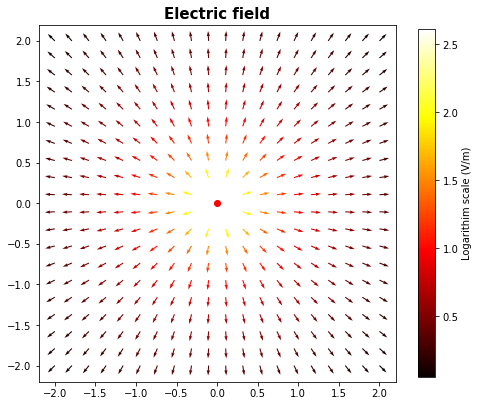

In [11]:
fig2, ax2 = plt.subplots(figsize = (8,8))
s = ax2.quiver(x, y, ex_u, ey_u, e_log, cmap = 'hot')
ax2.scatter(x1_pos, y1_pos, marker = 'o', c = 'red')
ax2.set_aspect('equal')
ax2.set_title('Electric field', fontsize= 15, fontweight='bold')
c = plt.colorbar(s, shrink = 0.8)
c.set_label('Logarithim scale (V/m)')
plt.show()

### Using the Python classes
In the above electric potential and electric field has been computed for single charge. In a region of space containing multiple charges the potential and electric field can be determined using the principal of superposition i.e. simply adding the potentials and electric fields due to indivisual charges. In above functional programming approach as been used for compuatation purpose for single charge, but for many body system or charges this approach becomes more cumbersome therefore a new method of using python classses is introduced in this part.

In [12]:
# This class takes the charge magnitude and position to calculate the potential and electric fields indivisually. 
class efield:
    def __init__(self, charge, x_pos, y_pos):      # attributes of the efield, class, also knows as instance
        self.charge = charge         
        self.x_pos = x_pos
        self.y_pos = y_pos
        
    def v(self):         # This method is used to compute the potential field
        return k*self.charge/np.sqrt((x - self.x_pos)**2 + (y - self.y_pos)**2) 
    
    def ex(self):       # To calculate the x-component of electric field
        return (k*self.charge*(x-self.x_pos)) / ((x-self.x_pos)**2 + (y-self.y_pos)**2)**1.5
    
    def ey(self):      # method defined to calculate the y-component of electric field
        return (k*self.charge*(y-self.y_pos)) / ((x-self.x_pos)**2 + (y-self.y_pos)**2)**1.5

In [13]:
k = 9*10**9   # Nm^2/C^2
#d = np.concatenate((np.linspace(-5, -0.5, 10), np.linspace(0.5, 5, 10)))
d = np.linspace(-5, 5, 40)
x, y = np.meshgrid(d, d)
q1 = efield(10**-9, -1, 3)        # charge 'q1' is declared to class, efield
q2 = efield(-10**-9, 1, -2)       # charge 'q2' is declared to class, efield
potential_total = q1.v() + q2.v()   # class defined method potential is called for both charges

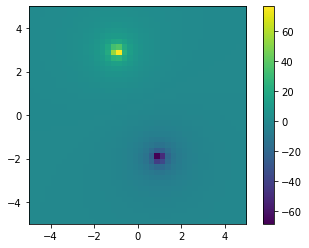

In [14]:
#V_max = 150
#potential_total[potential_total>V_max] = V_max

fig1, ax1 = plt.subplots()
s1 = ax1.imshow(potential_total, origin = 'lower', extent = [x.min(), x.max(), y.min(), y.max()])
plt.colorbar(s1)

<IPython.core.display.Javascript object>


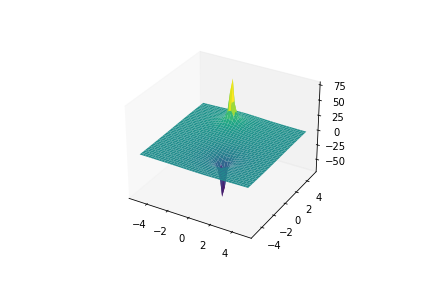

In [15]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(x, y, potential_total, cmap = 'viridis')
ax.grid(False)

<IPython.core.display.Javascript object>


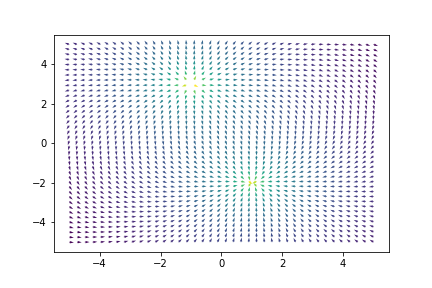

In [16]:
ex_total = q1.ex() + q2.ex()
ey_total = q1.ey() +q2.ey()
e_mag = np.sqrt(ex_total**2 + ey_total**2)

#ex_max = 100
#ey_max = 100
#ex_total[ex_total>ex_max] = ex_max
#ey_total[ey_total>ey_max] = ey_max


fig, ax = plt.subplots()
ax.quiver(x, y, ex_total/e_mag, ey_total/e_mag, np.log10(e_mag), cmap = 'viridis')
#ax.quiver(x, y, ex_total, ey_total)

<IPython.core.display.Javascript object>


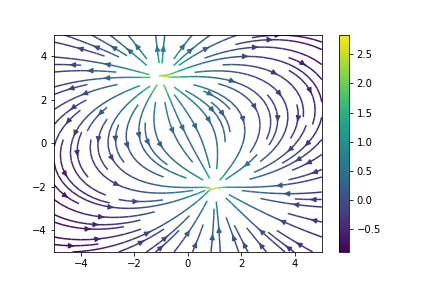

In [17]:
fig, ax = plt.subplots()
#ax.streamplot(x, y, ex_total/e_mag, ey_total/e_mag)
s = ax.streamplot(x, y, ex_total, ey_total, color = np.log10(e_mag))
fig.colorbar(s.lines)